Part 1: Basics of basics (-_-) nothing much to explore here you can move on to the next part...

In [66]:
import torch

In [67]:
x = torch.Tensor([1,2,3,4,5])
y = torch.Tensor([1,2])
x.shape

torch.Size([5])

In [68]:
z = torch.zeros([4,2])  
z

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [69]:
y =torch.rand([2,5]) #random initialization of 2 X 5
y

tensor([[0.3376, 0.6898, 0.8258, 0.0431, 0.6752],
        [0.7235, 0.0321, 0.3005, 0.5834, 0.7890]])

In [70]:
y.view([5,2]) #similar to reshape

tensor([[0.3376, 0.6898],
        [0.8258, 0.0431],
        [0.6752, 0.7235],
        [0.0321, 0.3005],
        [0.5834, 0.7890]])

Part 2: Data

In [71]:
import torch
import torchvision #helps in data augumentation
from torchvision import transforms, datasets #visit https://pytorch.org/vision/0.8/datasets.html for finding what all datasets are included || https://pytorch.org/vision/0.8/transforms.html

In [72]:
train = datasets.MNIST("", train=True, download = True, transform=transforms.Compose([transforms.ToTensor()]))  

test = datasets.MNIST("", train=False, download = True, transform=transforms.Compose([transforms.ToTensor()]))

In [73]:
len(train), len(test)

(60000, 10000)

In [74]:
 #https://pytorch.org/vision/0.8/transforms.html

 trainset = torch.utils.data.DataLoader(train, batch_size = 32, shuffle = True)
 testset = torch.utils.data.DataLoader(test, batch_size = 32, shuffle = True)

In [75]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [76]:
x,y = data[0][0] , data[0][1] 
x.shape

torch.Size([1, 28, 28])

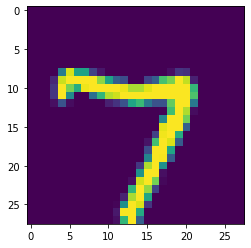

In [77]:
import matplotlib.pyplot as plt
plt.imshow(x.view(28,28))
plt.show()

In [78]:
tot = 0
counter_dict = {x:0 for x in range(10)}

for data in trainset:
  xs , ys = data
  for y in ys:
    counter_dict[int(y)]+=1
    tot+=1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [79]:
for i in counter_dict:
  print(f"{i} -> {counter_dict[i]/tot*100}")

0 -> 9.871666666666666
1 -> 11.236666666666666
2 -> 9.93
3 -> 10.218333333333334
4 -> 9.736666666666666
5 -> 9.035
6 -> 9.863333333333333
7 -> 10.441666666666666
8 -> 9.751666666666667
9 -> 9.915000000000001


Part 3: Building a Neural Network

In [80]:
train = datasets.MNIST("", train=True, download = True, transform=transforms.Compose([transforms.ToTensor()]))  

test = datasets.MNIST("", train=False, download = True, transform=transforms.Compose([transforms.ToTensor()]))

In [81]:
import torch.nn as nn
import torch.nn.functional as F

In [82]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28,64)   #28*28 is image size 
    self.fc2 = nn.Linear(64,64)
    self.fc3 = nn.Linear(64,64)
    self.fc4 = nn.Linear(64,10)      #10 is number of classes
  
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x, dim=1)

 


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [83]:
X = torch.rand((28,28))
X

tensor([[6.2948e-01, 1.6900e-01, 8.6543e-01, 9.7684e-01, 6.5310e-01, 6.8175e-01,
         6.2155e-01, 5.3698e-01, 1.0132e-01, 4.8787e-01, 7.0610e-01, 2.7072e-01,
         1.7535e-01, 9.1328e-01, 6.8262e-01, 3.2082e-01, 6.6312e-01, 9.5110e-01,
         9.4440e-02, 7.7122e-01, 5.9898e-01, 7.8543e-01, 9.4115e-01, 3.1592e-01,
         7.2241e-01, 5.6816e-01, 6.6644e-01, 3.2239e-01],
        [3.4615e-01, 5.3234e-01, 1.6574e-01, 7.1988e-01, 6.2933e-01, 8.4962e-01,
         9.2052e-01, 7.1206e-01, 9.4665e-02, 8.8101e-01, 4.1311e-01, 8.3667e-02,
         2.2665e-01, 4.5980e-01, 4.6568e-02, 3.0062e-01, 3.2434e-01, 2.5427e-01,
         1.5508e-01, 6.4844e-01, 6.2470e-01, 2.2419e-01, 2.8087e-01, 5.9692e-01,
         9.5767e-01, 3.6745e-01, 5.2590e-01, 1.9125e-01],
        [2.4681e-01, 9.2722e-01, 9.4402e-01, 2.2417e-01, 2.5078e-01, 3.9174e-02,
         8.2470e-01, 6.7913e-01, 1.6460e-01, 1.6641e-01, 7.1156e-01, 2.8245e-01,
         3.5385e-01, 8.3935e-01, 8.9314e-01, 1.2068e-02, 8.2876e-01, 6.115

In [84]:
#output = net(X) #gives error ... so needs to be flatten

In [85]:
o1=net(X.view(-1,28*28))  #use -1 if not sure about the dimension
o2 = net(X.view(1,28*28))
o1,o2

(tensor([[-2.3591, -2.1799, -2.1983, -2.2887, -2.3418, -2.3063, -2.3710, -2.4213,
          -2.2132, -2.3782]], grad_fn=<LogSoftmaxBackward>),
 tensor([[-2.3591, -2.1799, -2.1983, -2.2887, -2.3418, -2.3063, -2.3710, -2.4213,
          -2.2132, -2.3782]], grad_fn=<LogSoftmaxBackward>))

Part 4: Training the model

In [86]:
import torch.optim as optim 

optimizer = optim.Adam(net.parameters(), lr = 0.001)

epochs = 3
for epoch in range(epochs):
  for data in trainset:
    x,y = data
    net.zero_grad()
    output = net(x.view(-1,784))
    loss = F.nll_loss(output, y)
    loss.backward()  #https://stackoverflow.com/questions/53975717/pytorch-connection-between-loss-backward-and-optimizer-step
    optimizer.step() #https://pytorch.org/docs/master/generated/torch.optim.Optimizer.step.html
  print(loss)

tensor(0.2745, grad_fn=<NllLossBackward>)
tensor(0.4745, grad_fn=<NllLossBackward>)
tensor(0.1109, grad_fn=<NllLossBackward>)


In [87]:
  correct = 0
  tot = 0
  with torch.no_grad():
    for data in trainset:
      x,y = data
      output = net(x.view(-1,784))
      for idx, i in enumerate(output):
        if torch.argmax(i)==y[idx]:
          correct+=1
        tot+=1
    
print(f"Accuracy {round(correct/tot,3)}")

Accuracy 0.971


In [88]:
a = torch.Tensor([0,1,0,1,1,0,1,0])
a=a.view(2,4)
a

tensor([[0., 1., 0., 1.],
        [1., 0., 1., 0.]])

In [89]:
for i in a:
  print(torch.argmax(i))  #use of argmax

tensor(1)
tensor(0)


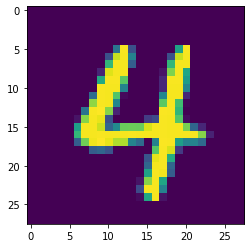

tensor(4)


In [90]:
import matplotlib.pyplot as plt
plt.imshow(x[1].view(28,28))
plt.show()
print(torch.argmax(net(x[1].view(-1,784))[0]))  

In [91]:
print(torch.argmax(net(x[2].view(-1,784))[0]))  

tensor(3)


In [92]:
y[2]

tensor(3)

Part 5: ConvNet using Pytorch

In [93]:
from google.colab import drive        #uploaded the zip file on my drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/ZipFiles/kagglecatsanddogs_3367a (1).zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [95]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [96]:
rebuild = False

In [97]:
class dogsvscats():
  size = 50
  cats = "/content/PetImages/Cat"
  dogs = "/content/PetImages/Dog"
  Labels = {cats:0, dogs:1}
  training_data = []
  catcount=0
  dogcount=0

  def make_training_data(self):
    for label in self.Labels:
      print(label)
      for f in tqdm(os.listdir(label)):
        try:
          path = os.path.join(label,f)
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (self.size,self.size))
          self.training_data.append([np.array(img), np.eye(2)[self.Labels[label]]])

          if label==self.cats:
            self.catcount+=1
          elif label==self.dogs:
            self.dogcount+=1
        except Exception as e:
          pass

    np.random.shuffle(self.training_data)
    np.save("training_data.npy", self.training_data)
    print("cats:" , self.catcount)
    print("dogs:", self.dogcount)

if rebuild:
  dvc = dogsvscats()
  dvc.make_training_data()


In [98]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [99]:
print(len(training_data))

24946


In [100]:
training_data[0]

array([array([[146, 147, 147, ..., 157, 158, 155],
       [148, 149, 151, ..., 159, 157, 156],
       [149, 150, 150, ..., 159, 159, 158],
       ...,
       [ 40,  48,  47, ..., 143, 142, 140],
       [ 52,  56,  52, ..., 142, 141,  72],
       [ 52,  56,  55, ..., 141, 139,  39]], dtype=uint8),
       array([1., 0.])], dtype=object)

In [101]:
x,y = training_data[2]

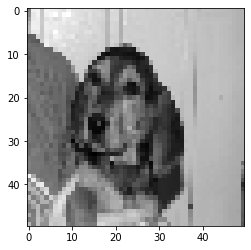

In [102]:
import matplotlib.pyplot as plt
plt.imshow(x, cmap="gray")
plt.show()

Part 6: Training the ConvNet

In [103]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [104]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 5) # input is 1 image, 32 output channels, 5x5 kernel / window
        self.conv2 = nn.Conv2d(32, 64, 5) # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 kernel / window
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 2) # 512 in, 2 out bc we're doing 2 classes (dog vs cat).

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # .view is reshape ... this flattens X before 
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.softmax(x, dim=1)


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [105]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters() , lr=0.001)
loss_function = nn.MSELoss()

x = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
x = x/255.0

y = torch.Tensor([i[1] for i in training_data])

valpct = 0.1
valsize = int(len(x)*valpct)
print(valsize)

2494


In [106]:
train_X = x[:-valsize]
train_y = y[:-valsize]

test_X = x[-valsize:]
test_y = y[-valsize:]

print(len(train_X), len(test_X))

22452 2494


In [107]:
BATCH_SIZE = 100
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        #print(f"{i}:{i+BATCH_SIZE}")
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. Loss: {loss}")

100%|██████████| 225/225 [01:40<00:00,  2.24it/s]

Epoch: 0. Loss: 0.2304847538471222


In [108]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 50, 50))[0]  # returns a list, 
        predicted_class = torch.argmax(net_out)

        if predicted_class == real_class:
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 3))

100%|██████████| 2494/2494 [00:06<00:00, 361.51it/s]

Accuracy:  0.635


Part 7: using GPUs

In [109]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [110]:
torch.cuda.is_available()

True

In [111]:
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

In [112]:
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

In [113]:
net = Net().to(device)

In [114]:
EPOCHS = 3

def train(net):
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    BATCH_SIZE = 100
    EPOCHS = 3
    for epoch in range(EPOCHS):
        for i in range(0, len(train_X), BATCH_SIZE): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
            #print(f"{i}:{i+BATCH_SIZE}")
            batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
            batch_y = train_y[i:i+BATCH_SIZE]

            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            net.zero_grad()

            optimizer.zero_grad()   # zero the gradient buffers
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()    # Does the update

        print(f"Epoch: {epoch}. Loss: {loss}")

train(net)

Epoch: 0. Loss: 0.23113033175468445
Epoch: 1. Loss: 0.18704314529895782
Epoch: 2. Loss: 0.16056428849697113


In [121]:
test_X.to(device)
test_y.to(device)

def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i]).to(device)
            net_out = net(test_X[i].view(-1, 1, 50, 50).to(device))[0]  # returns a list, 
            predicted_class = torch.argmax(net_out)

            if predicted_class == real_class:
                correct += 1
            total += 1

    print("\nAccuracy: ", round(correct/total, 3))

test(net)

100%|██████████| 2494/2494 [00:02<00:00, 902.61it/s]


Accuracy:  0.748
